In [1]:
import pandas as pd
import numpy as np
%pylab inline

from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Populating the interactive namespace from numpy and matplotlib


# Objective 

To predict how many people will stay.

# Data Preparation

In [2]:
data = pd.read_csv("HR_data.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,role,salary,role_code,salary code
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1


In [3]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'role', 'salary', 'role_code', 'salary code'],
      dtype='object')

We notice that the columns "role" and "salary" can be removed as they are already dummified in the given data.

In [4]:
data = data.drop(["role","salary"],1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,role_code,salary code
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
role_code                14999 non-null int64
salary code              14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


Here, all the columns have complete data; no missing data. 

The total number of entries in each column : 14999

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,role_code,salary code
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,4.339823,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,7.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000


Here on a broader view we can say that - 

Mean satisfaction level : 61.3% ie., more than half of the employees are satisfied with their job and environment.

Most of the employees do get enough projects to work on ie., arnd 4.

Mean monthly_hours of workiing : 201 hrs

Majority seem to have left the job.

Hardly 2% employees have been awarded promotion in last 5 years.



# Data Evaluation

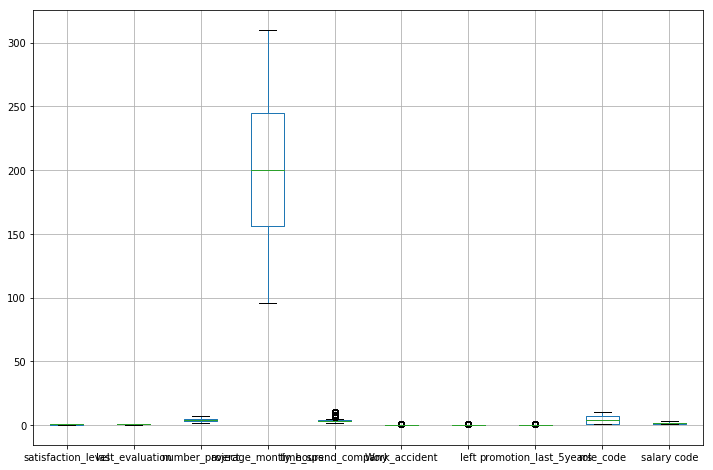

In [7]:
data.boxplot(figsize=(12,8))

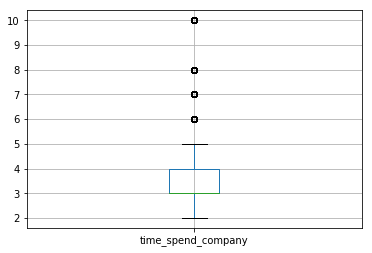

In [8]:
data[["time_spend_company"]].boxplot()

We note that here there are only 4 outliers. Since spending time in company is an important factor influencing the decision of the employee to stay or not, removing these will alter the result. So we do not remove these.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015BCAF91B00>,
      dtype=object)

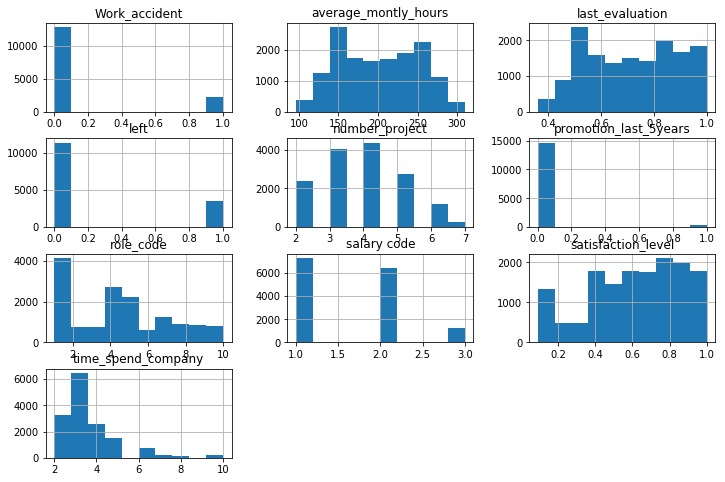

In [9]:
data.hist(figsize=(12,8))

We see that - 

"left", "role_code", "satisfaction_level" and "salary_code" are categorical variables so they need to be dummified for analysis.  

# Data Visualization and Interpretations

In [10]:
import seaborn as sb

C:\Users\Krishna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


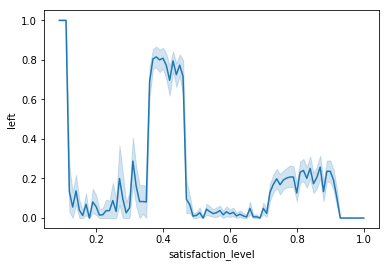

In [11]:
sb.lineplot(data.satisfaction_level,data.left)

Notice that employees with satisfaction level around 10% , 40% tend to leave the company.

Even employees with satisfaction level (70% - 90%) show little tendency to leave!

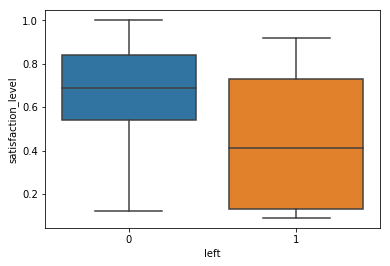

In [12]:
sb.boxplot(data.left,data.satisfaction_level)

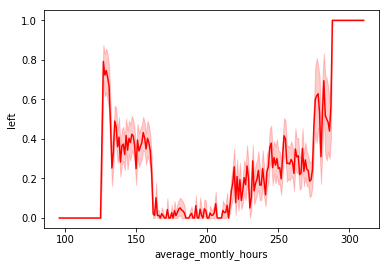

In [13]:
sb.lineplot(data.average_montly_hours,data.left,color = "r")

Employees who have averge monthly hours less and quite high tend to leave.

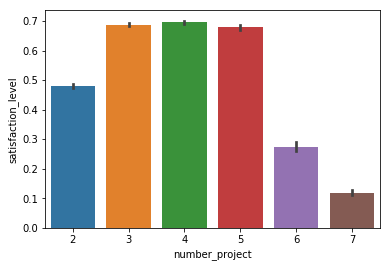

In [14]:
sb.barplot(data.number_project,data.satisfaction_level)

As expected , employees with less projects (2) and those with many projects(6,7) are less satisfied.

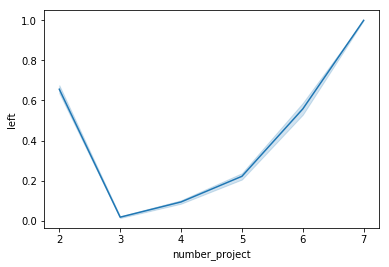

In [15]:
sb.lineplot(data.number_project,data.left)

This explicitly shows the relation between the number of projects and the tendency to leave.

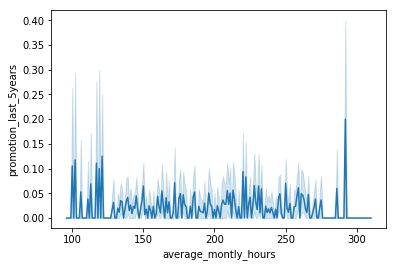

In [16]:
sb.lineplot(data.average_montly_hours,data.promotion_last_5years)

We note that there is no much relation between the number of average working hours and the number of projects handled.

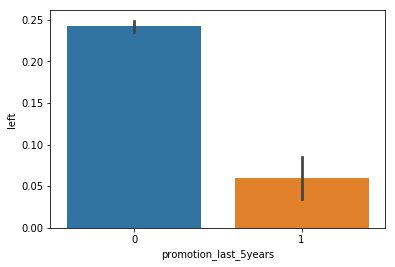

In [17]:
sb.barplot(data.promotion_last_5years,data.left)

We see that majority of the employees were not promoted in the last 5 years and hence they tend to leave.

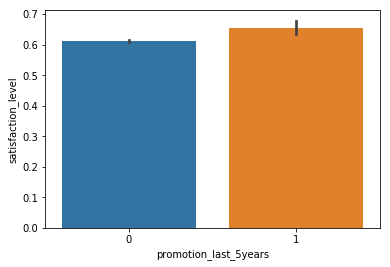

In [18]:
sb.barplot(data.promotion_last_5years,data.satisfaction_level)

Even though the employees didn't receive any promotion in last 5 years , this doesn't seem to affect their satisfaction level much.

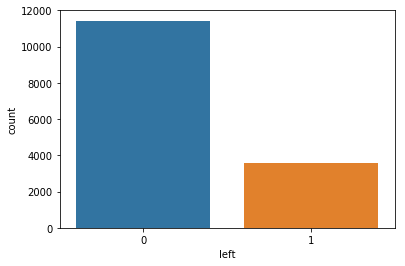

In [19]:
sb.countplot(data.left)

The number of employees leaving is more than double the employees staying.

# Data Modelling and Validation

# 1. Logistic Regression

In [20]:
X=data.drop("left",1)
y=data["left"]

In [21]:
import statsmodels.api as st

In [22]:
stlg = st.Logit(y,st.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.431320
         Iterations 7


In [23]:
stlg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14989
Method:                           MLE   Df Model:                            9
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:                  0.2142
Time:                        17:51:47   Log-Likelihood:                -6469.4
converged:                       True   LL-Null:                       -8232.3
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3259      0.132     10.008      0.000       1.066       1.586
satisfaction_level       -4.1236      0.098    -42.268      0.000      -4.315      -3.932
last_evaluation           0.7333      0.149      4.938      0.000       0.442       1.024
number_project           -0.3111      0.021    -14.691      0.000      -0.353      -0.270
average_montly_hours      0.0044      0.001      8.649      0.000       0.003       0.005
time_spend_company        0.2557      0.015     16.777      0.000       0.226       0.286
Work_accident            -1.5331      0.089    -17.137      0.000      -1.708      -1.358
promotion_last_5years    -1.5055      0.256     -5.872      0.000      -2.008      -1.003
role_code                -0.0305      0.008     -3.872      0.000      -0.046      -0.015
salary code              -0.7008      0.038    -18.511      0.000      -0.775      -0.627
=========================================================================================
"""

In [24]:
stlg.predict()

array([0.56427946, 0.16355553, 0.53465173, ..., 0.52890076, 0.75455215,
       0.54364264])

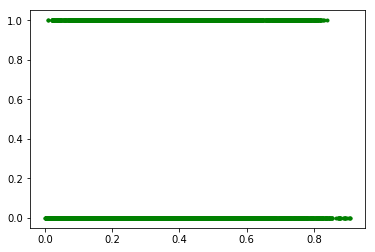

In [25]:
plt.plot(stlg.predict(),y,"g.")

# Validation

In [26]:
stlg.pred_table(threshold = .6)

array([[10934.,   494.],
       [ 2889.,   682.]])

Accuracy = (10934+682)/(10934+494+2889+682) = 11616/14999 = .7744 = 77.44%

Recall = 10934/(10934+494) = 10934/11428 = .9768 = 97.68%

Precision = 10934/(10934+2889) = 10934/13823 = .7910 = 79.10% 

We see that , our model doesn't fit that well. The precision is quite low.

In [27]:
sklg = linear_model.LogisticRegression().fit(X,y)

C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
sklg.predict(X)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
metrics.roc_auc_score(y,sklg.predict(X))

0.6412619811892303

In [30]:
sklgfpr, sklgtpr, sklgthresholds = metrics.roc_curve(y, sklg.predict_proba(X)[:,1])

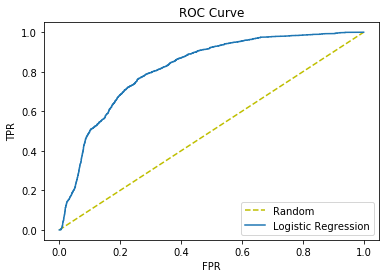

In [31]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(sklgfpr, sklgtpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Logistic Regression"])
plt.title("ROC Curve")
plt.show()

# 2. Decision Tree

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10499, 9) (4500, 9) (10499,) (4500,)


In [33]:
dt = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=10,random_state=0)

In [34]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [35]:
dt.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
from IPython.display import *
from graphviz import Source

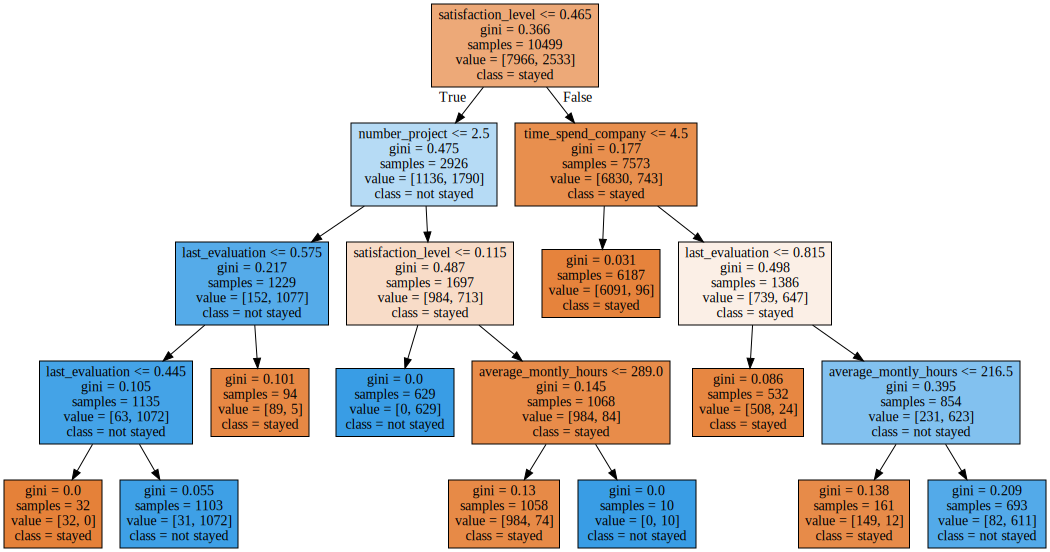

In [37]:
model = dt
cols=X_test.columns
class_list=["stayed","not stayed"]

graph = Source(tree.export_graphviz(model, out_file=None, feature_names=cols, class_names = class_list, filled = True))

display(SVG(graph.pipe(format='svg')))

# Validation

In [38]:
print("Train accuracy :",dt.score(X_train, y_train),"\nTest acccuracy :", dt.score(X_test, y_test))

Train accuracy : 0.9691399180874369 
Test acccuracy : 0.9653333333333334


We see that Decision Tree fits very well with an accuracy of 96.5%.

In [39]:
dtfpr, dttpr, dtthresholds = metrics.roc_curve(y_test, dt.predict_proba(X_test)[:,1])

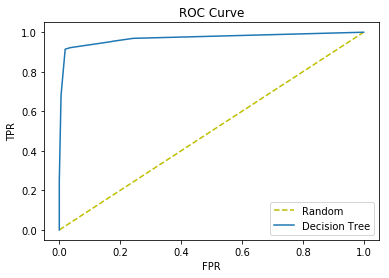

In [40]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(dtfpr, dttpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Decision Tree"])
plt.title("ROC Curve")
plt.show()

The model exceptionally distinguishes who stayed and left.

# 3. Random Forest

In [41]:
rf = RandomForestClassifier(n_estimators=200,max_depth=5, random_state=0)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
rf.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Validation

In [44]:
print("Train accuracy :",rf.score(X_train, y_train),"\nTest acccuracy :", rf.score(X_test, y_test))

Train accuracy : 0.9753309839032289 
Test acccuracy : 0.9726666666666667


We notice that this fits even more perfectly with accuracy of 97.3%.

In [45]:
rffpr, rftpr, rfthresholds = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])

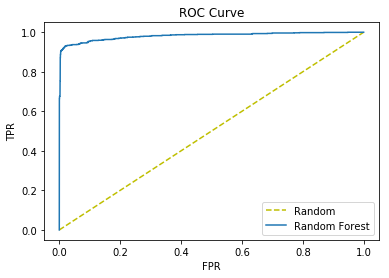

In [46]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(rffpr, rftpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Random Forest"])
plt.title("ROC Curve")
plt.show()

The model distinguishes very well.

# 4. K Nearest Neighbors (KNN)

In [47]:
knn= neighbors.KNeighborsClassifier(n_neighbors=3)

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [49]:
knn.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Validation

In [50]:
print("Train accuracy :",knn.score(X_train,y_train), "\nTest accuracy :",knn.score(X_test,y_test))

Train accuracy : 0.9671397275931041 
Test accuracy : 0.9415555555555556


We note the accuracy is still high ie., 94.2% ie, the model does fit good.

In [51]:
knnfpr, knntpr, knnthresholds = metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,1])

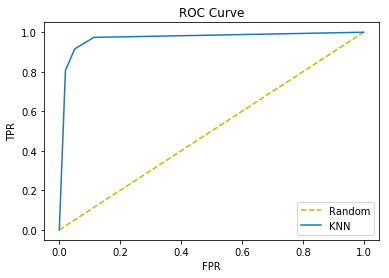

In [52]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(knnfpr, knntpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "KNN"])
plt.title("ROC Curve")
plt.show()

# 5. Naive Bayes

In [53]:
nb=naive_bayes.GaussianNB()

In [54]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
nb.predict(X)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

# Validation

In [56]:
print("Train accuracy :",nb.score(X_train,y_train), "\nTest accuracy :",nb.score(X_test,y_test))

Train accuracy : 0.7941708734165158 
Test accuracy : 0.7993333333333333


The model fit isnt that good ; has accuracy of 79.9%.

In [57]:
nbfpr, nbtpr, knnthresholds = metrics.roc_curve(y_test, nb.predict_proba(X_test)[:,1])

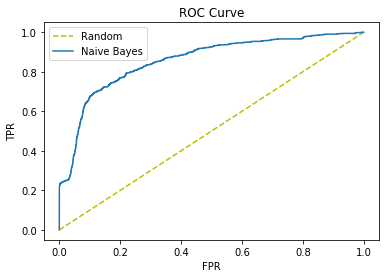

In [58]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(nbfpr,nbtpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Naive Bayes"])
plt.title("ROC Curve")
plt.show()

# An Easy overall Comparison

## On the basis of ROC Curve

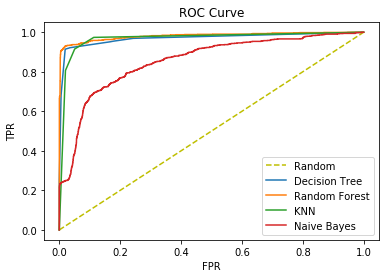

In [59]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(dtfpr,dttpr)
plt.plot(rffpr,rftpr)
plt.plot(knnfpr,knntpr)
plt.plot(nbfpr,nbtpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Decision Tree", "Random Forest", "KNN", "Naive Bayes"])
plt.title("ROC Curve")
plt.show()

Even though Decision Tree, Random Forest and KNN are all very good models, the best one amoung them is Random Forest, followed by Decision Tree , KNN and Naive Bayes. 

Let,

In [60]:
d ={"Models" : ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "Naive Bayes"], 
   "Accuracy" : ["77.4%", "96.5%", "97.3%", "94.2%", "79.9%"]}

# Conclusion

In [61]:
df = pd.DataFrame(data=d)
df.sort_values("Accuracy",ascending = False)

,Models,Accuracy
2,Random Forest,97.3%
1,Decision Tree,96.5%
3,KNN,94.2%
4,Naive Bayes,79.9%
0,Logistic Regression,77.4%


The best fit model is Random Forest followed by Decision Tree, KNN, Naive Bayes and Logistic Regression.